In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('reshaped_data.csv')

In [10]:
# Display the first few rows of the dataset
print(data.head())

# Summary of dataset
print(data.info())

# Summary statistics
print(data.describe(include='all'))


   Year                                    Source_Filename  emissions  \
0  1990  20231117_120secMother_AllCountries_002_TQ-Resu...   0.045548   
1  1991  20231117_120secMother_AllCountries_002_TQ-Resu...   0.037865   
2  1992  20231117_120secMother_AllCountries_002_TQ-Resu...   0.027159   
3  1993  20231117_120secMother_AllCountries_002_TQ-Resu...   0.027726   
4  1994  20231117_120secMother_AllCountries_002_TQ-Resu...   0.027586   

       Country Country_Code                          Industry  
0  Afghanistan          AFG  Administrative services industry  
1  Afghanistan          AFG  Administrative services industry  
2  Afghanistan          AFG  Administrative services industry  
3  Afghanistan          AFG  Administrative services industry  
4  Afghanistan          AFG  Administrative services industry  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535040 entries, 0 to 1535039
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------      

In [11]:
# Check for missing values
print(data.isnull().sum())

# Percentage of missing values
missing_percent = data.isnull().mean() * 100
print(missing_percent)


Year               0
Source_Filename    0
emissions          0
Country            0
Country_Code       0
Industry           0
dtype: int64
Year               0.0
Source_Filename    0.0
emissions          0.0
Country            0.0
Country_Code       0.0
Industry           0.0
dtype: float64


#### Emissions by Country

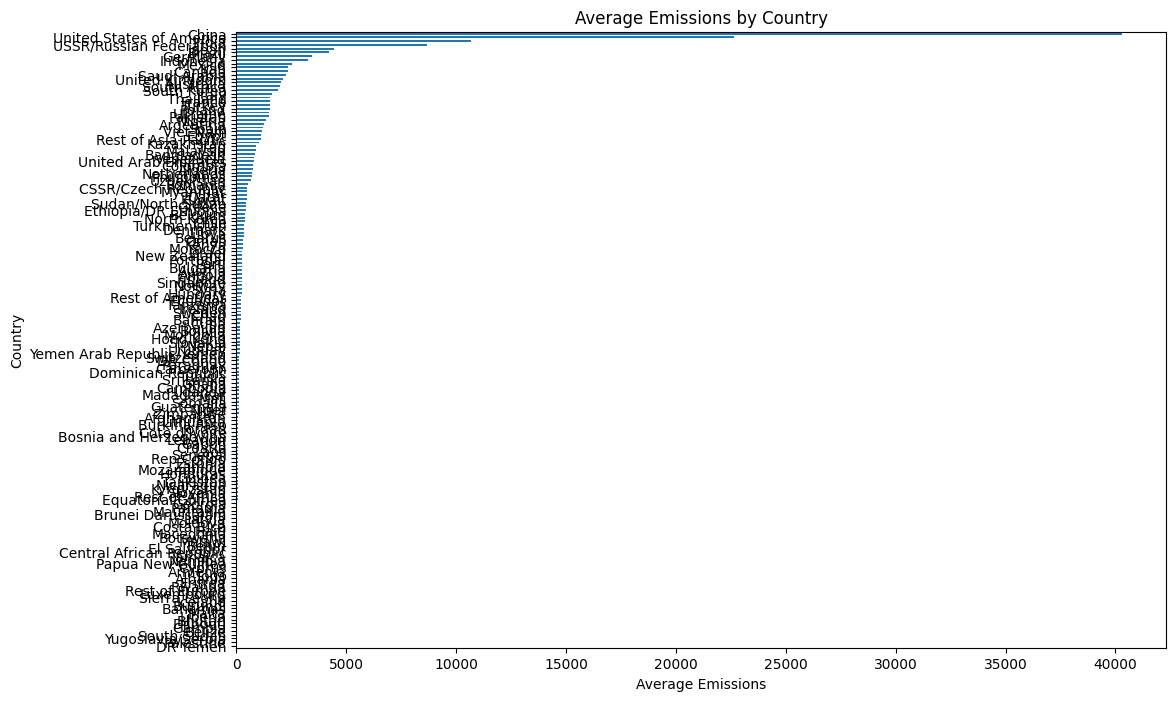

In [14]:
# Mean emissions by country
plt.figure(figsize=(12, 8))
mean_emissions_by_country = data.groupby('Country')['emissions'].mean().sort_values()
mean_emissions_by_country.plot(kind='barh')
plt.title('Average Emissions by Country')
plt.xlabel('Average Emissions')
plt.ylabel('Country')
plt.show()


#### Emissions by Industry

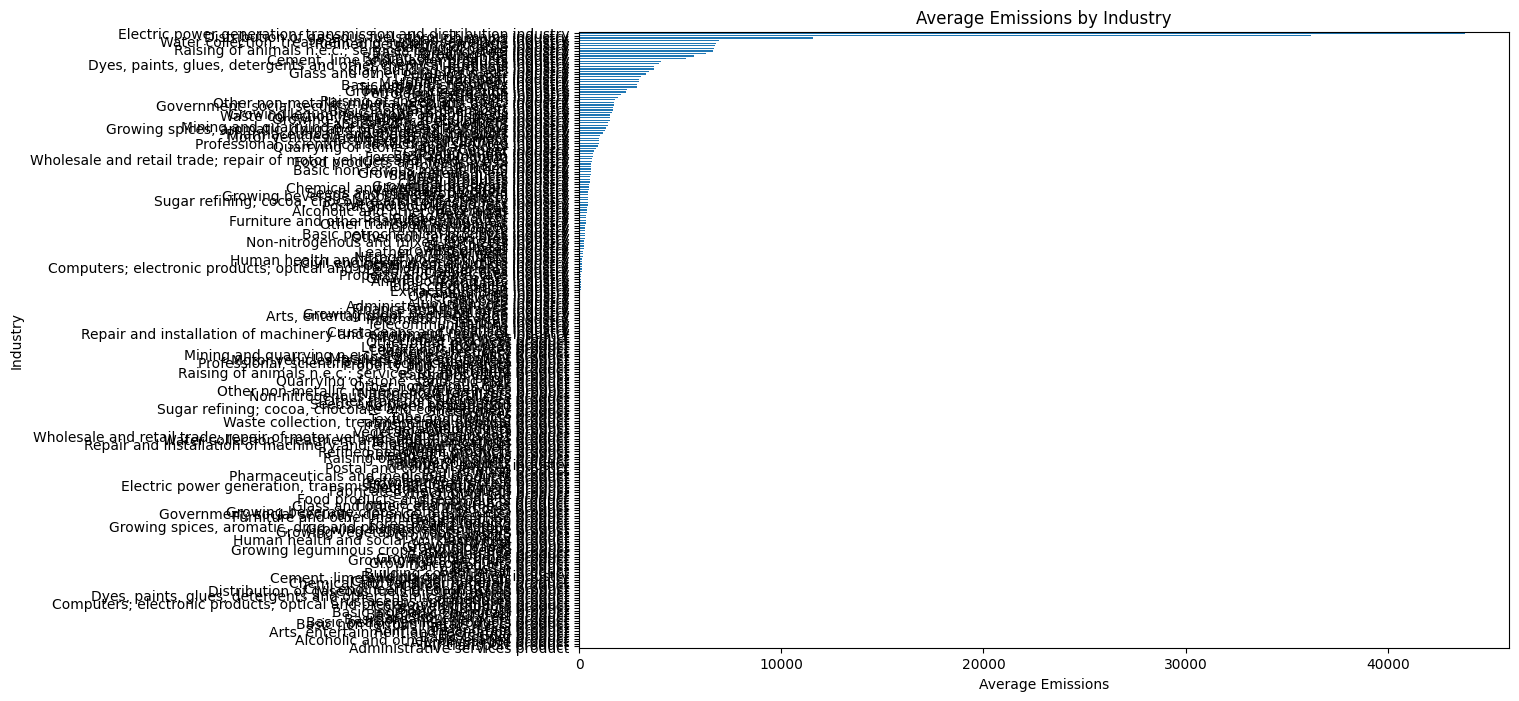

In [15]:
# Mean emissions by industry
plt.figure(figsize=(12, 8))
mean_emissions_by_industry = data.groupby('Industry')['emissions'].mean().sort_values()
mean_emissions_by_industry.plot(kind='barh')
plt.title('Average Emissions by Industry')
plt.xlabel('Average Emissions')
plt.ylabel('Industry')
plt.show()


#### Emissions over time

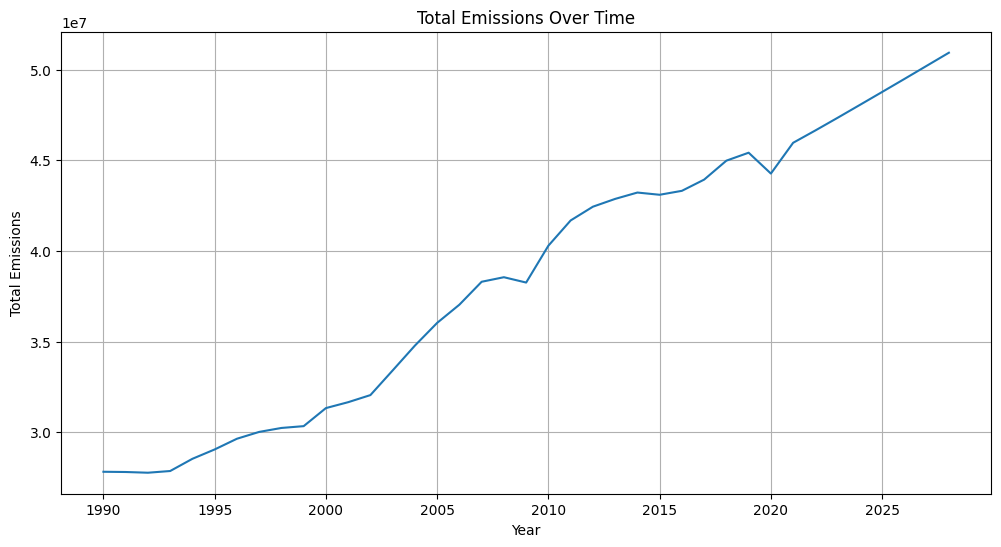

In [16]:
# Sum of emissions by year
plt.figure(figsize=(12, 6))
emissions_by_year = data.groupby('Year')['emissions'].sum()
emissions_by_year.plot(kind='line')
plt.title('Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()


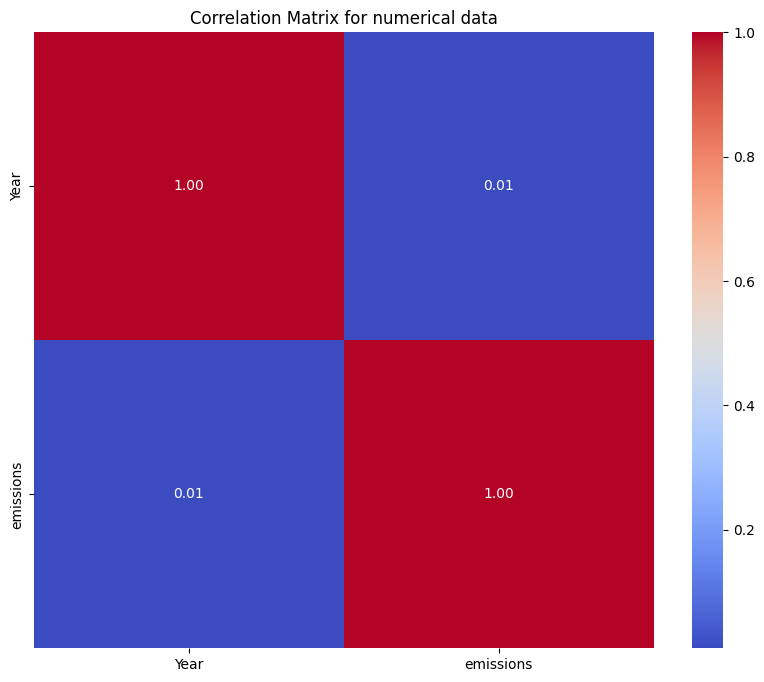

In [20]:

# Drop 'Source_Filename' column
data_no_filename = data.drop(columns=['Source_Filename'])

# Select only numerical columns for correlation
numerical_data = data_no_filename.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for numerical data')
plt.show()

No Strong Trend detected. 
There’s no strong upward or downward trend in emissions over time, at least as captured by the linear relationship. 
Emissions might not be increasing or decreasing consistently as the years progress.
Further analysis needed. To understand trends over time, time series analysis might reveal more insights.

### Segmentation and Grouping

In [7]:

# Group by country and year
country_emissions = data.groupby(['Country', 'Year'])['emissions'].sum().reset_index()

# Group by industry and year
industry_emissions = data.groupby(['Industry', 'Year'])['emissions'].sum().reset_index()

# Cross-analysis
cross_emissions = data.groupby(['Country', 'Industry', 'Year'])['emissions'].sum().reset_index()

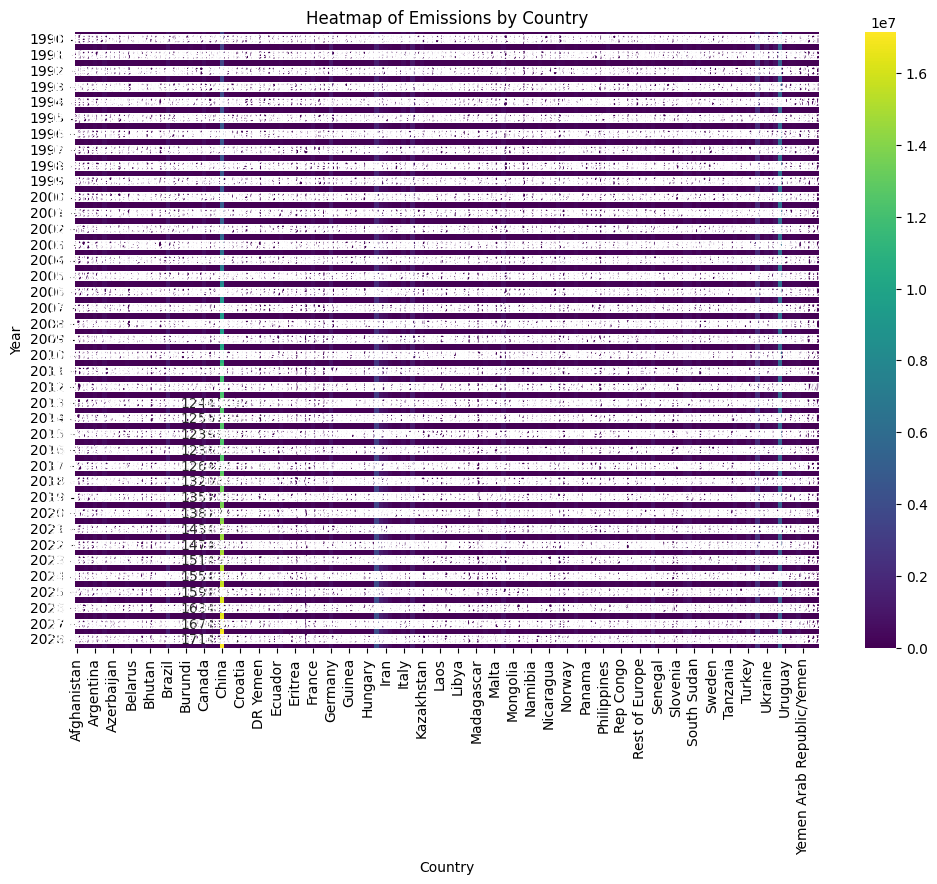

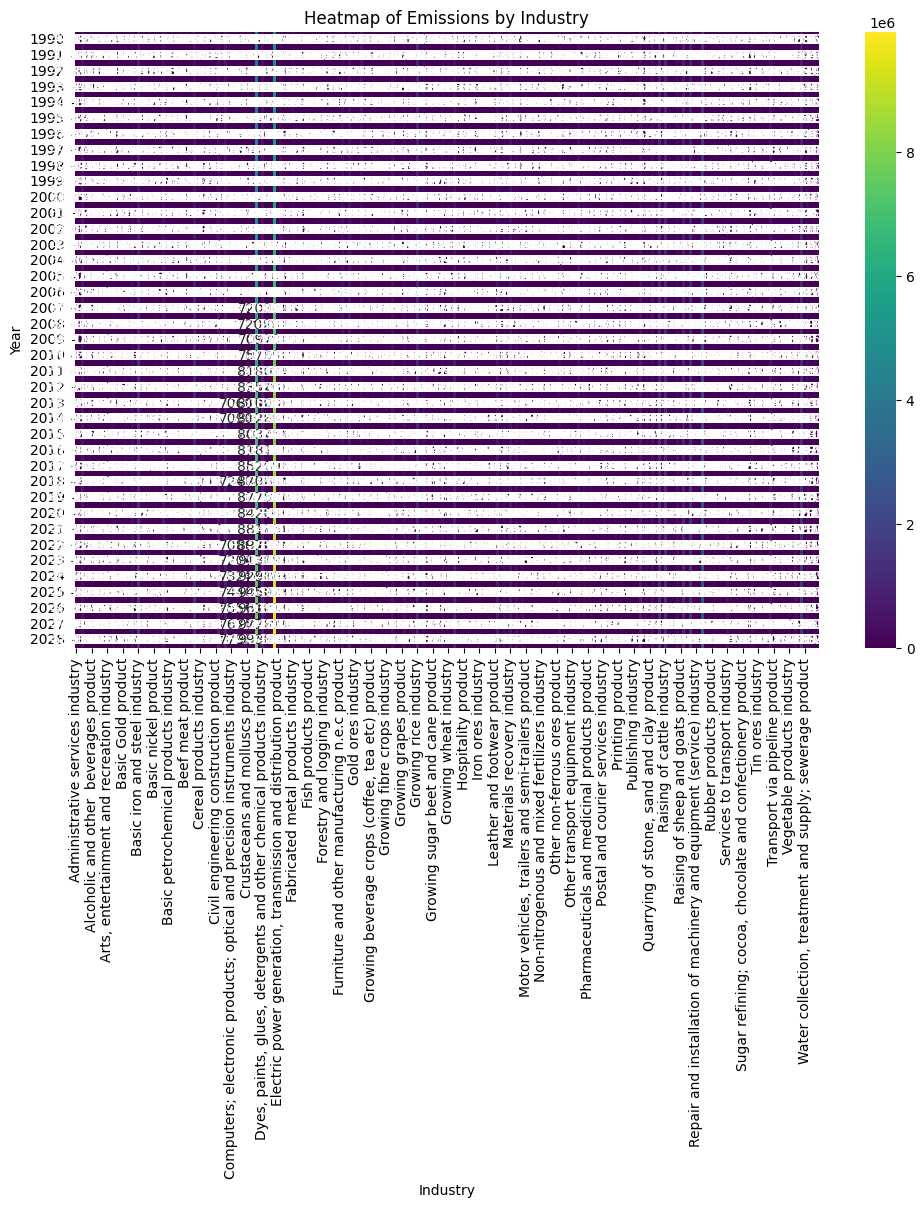

In [8]:
# Heatmap for country emissions
pivot_country = country_emissions.pivot(index='Year', columns='Country', values='emissions')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_country, cmap='viridis', annot=True, fmt=".1f")
plt.title('Heatmap of Emissions by Country')
plt.show()

# Heatmap for industry emissions
pivot_industry = industry_emissions.pivot(index='Year', columns='Industry', values='emissions')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_industry, cmap='viridis', annot=True, fmt=".1f")
plt.title('Heatmap of Emissions by Industry')
plt.show()
